# Problem 1 : Predicting SalePrice using GrLivArea
Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv')

Use the following Numeric variables from the dataset in this problem : GrLivArea and SalePrice


In [1]:
import pandas as pd

houseData = pd.read_csv('train.csv')
houseData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


a) Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship.


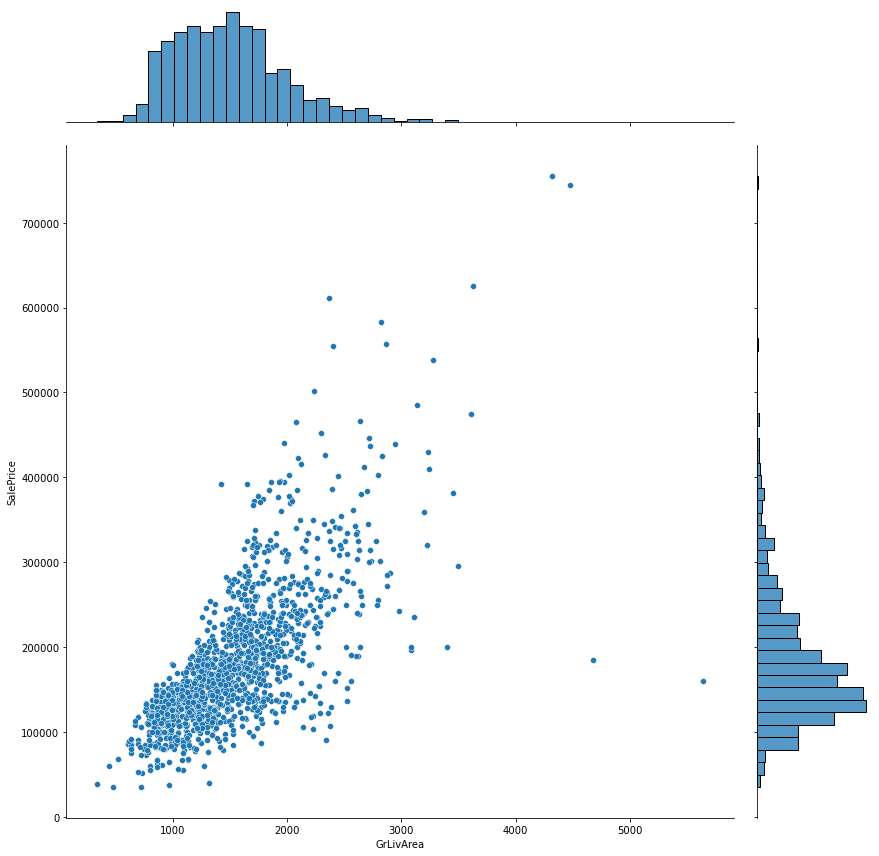

In [2]:
import seaborn as sb

SP = pd.DataFrame(houseData['SalePrice'])
GLA = pd.DataFrame(houseData['GrLivArea'])

# Create a joint dataframe by concatenating the two variables
SPGLAdataframe = pd.concat([SP, GLA], axis = 1).reindex(SP.index)

# Jointplot of SP againat GLA
sb.jointplot(data = SPGLAdataframe, x = "GrLivArea", y = "SalePrice", height = 12)

b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.


<AxesSubplot:>

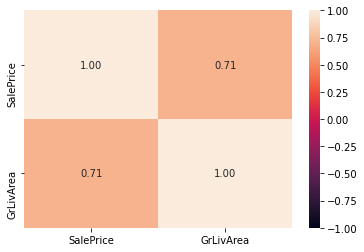

In [3]:
sb.heatmap(SPGLAdataframe.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression


In [4]:
from sklearn.linear_model import LinearRegression

d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test
houseData_train, houseData_test = train_test_split(houseData, test_size = 0.246)


# Check the sample sizes
print("Train Set :", houseData_train.shape)
print("Test Set  :", houseData_test.shape)

Train Set : (1100, 81)
Test Set  : (360, 81)


e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea.


In [6]:
# Create a Linear Regression object
linreg = LinearRegression()

# Obtain SP and GLA from the training data
SP_train = pd.DataFrame(houseData_train['SalePrice'])
GLA_train = pd.DataFrame(houseData_train['GrLivArea'])

# Train the linear regression model on the train dataset
# (predictor, response)
linreg.fit(GLA_train, SP_train)

LinearRegression()

f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot.


In [7]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [24515.60932658]
Coefficients 	: a =  [[103.47626657]]


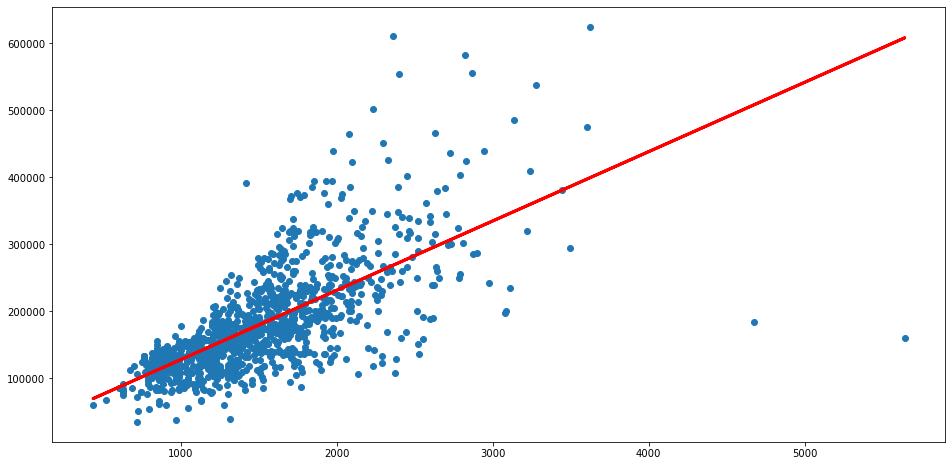

In [8]:
# Formula for the Regression line
regline_x = GLA_train
regline_y = linreg.intercept_ + linreg.coef_ * GLA_train

import matplotlib.pyplot as plt

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GLA_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.


In [9]:
from sklearn.metrics import mean_squared_error

# Predict Total values corresponding to HP
SP_train_pred = linreg.predict(GLA_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(GLA_train, SP_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_train, SP_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.473317790102729
Mean Squared Error (MSE) 	: 3252247748.879611



h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.


In [10]:
GLA_test = pd.DataFrame(houseData_test['GrLivArea'])
SP_test_pred = linreg.predict(GLA_test)

i) Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy.


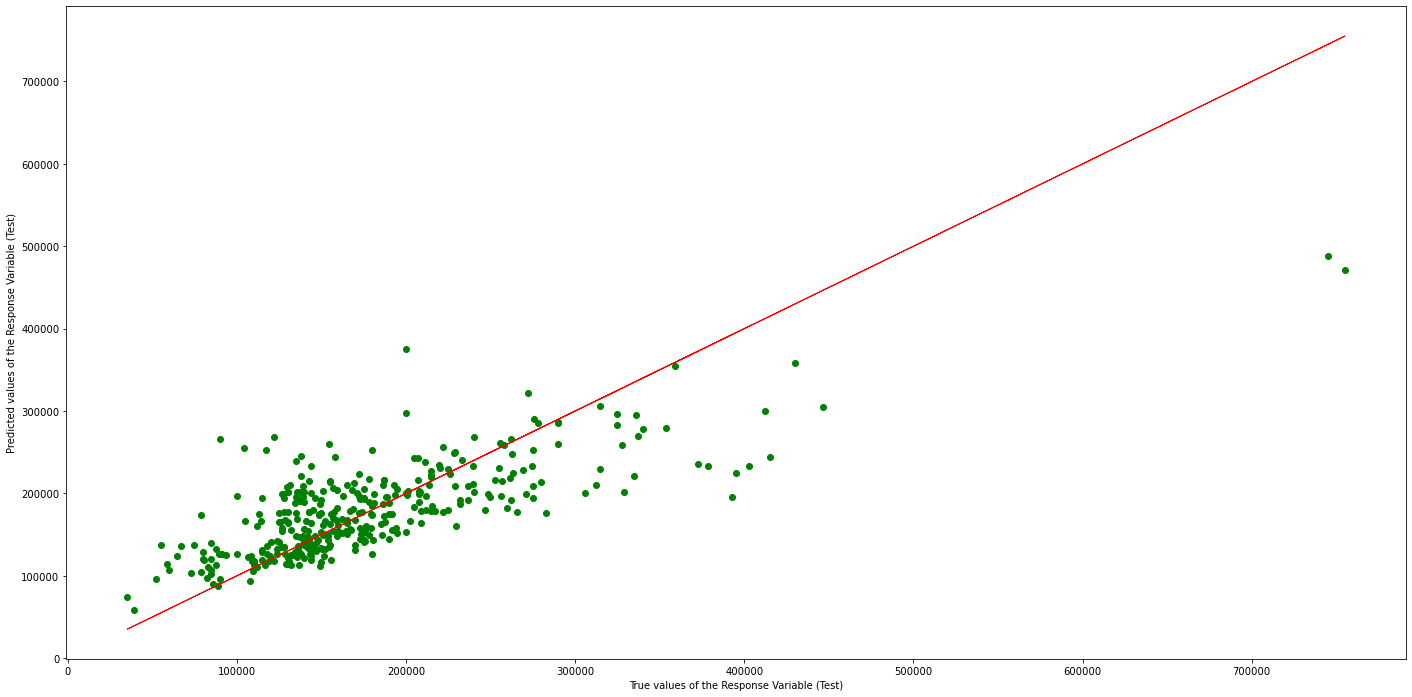

In [11]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))

SP_test = pd.DataFrame(houseData_test['SalePrice'])

axes.scatter(SP_test, SP_test_pred, color = "green")
axes.plot(SP_test, SP_test, 'w-', linewidth = 1, color = "red")
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.


In [12]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(GLA_test, SP_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_test, SP_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5802427052819199
Mean Squared Error (MSE) 	: 2812005665.518482



# Problem 2 : Predicting SalePrice using Other Variables
Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” one-by-one to perform individual Linear Regressions and obtain individual univariate Linear Regression Models in each case.


Intercept 	: b =  [157649.7045925]
Coefficients 	: a =  [[2.11061377]]


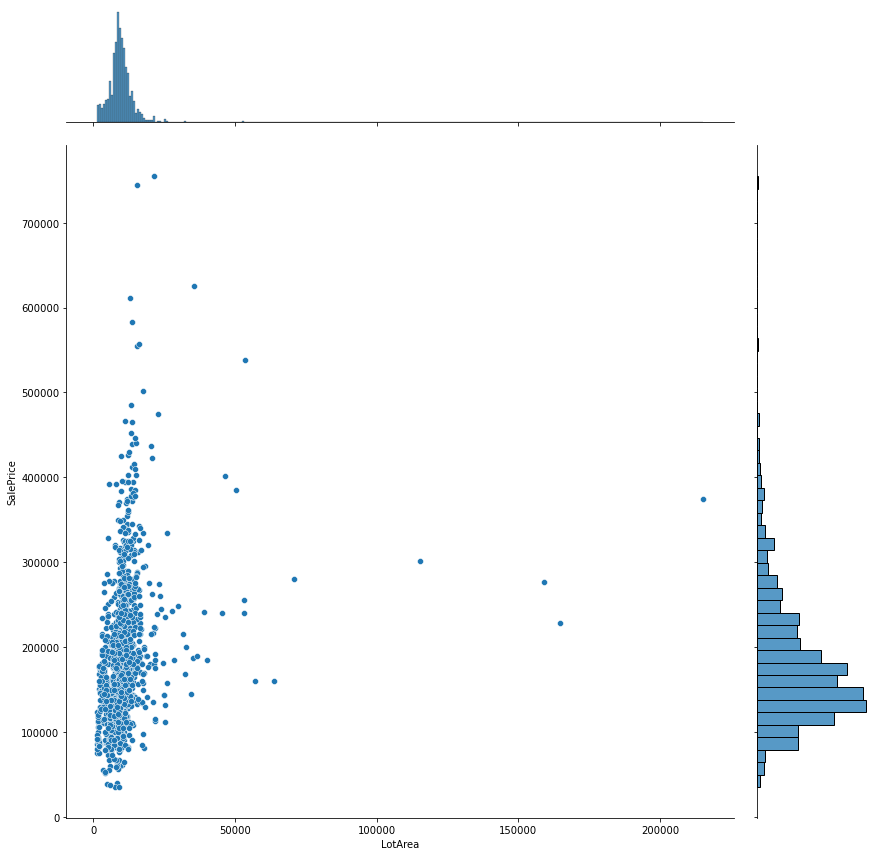

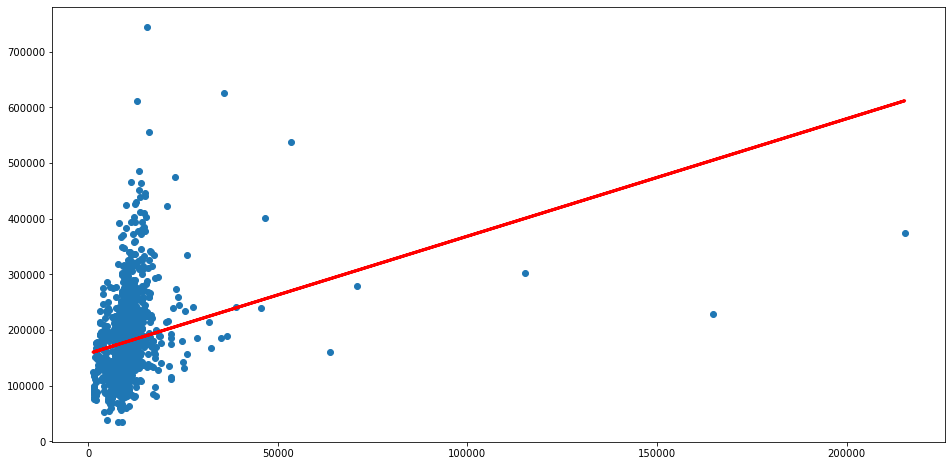

Intercept 	: b =  [63420.38390639]
Coefficients 	: a =  [[110.25171672]]


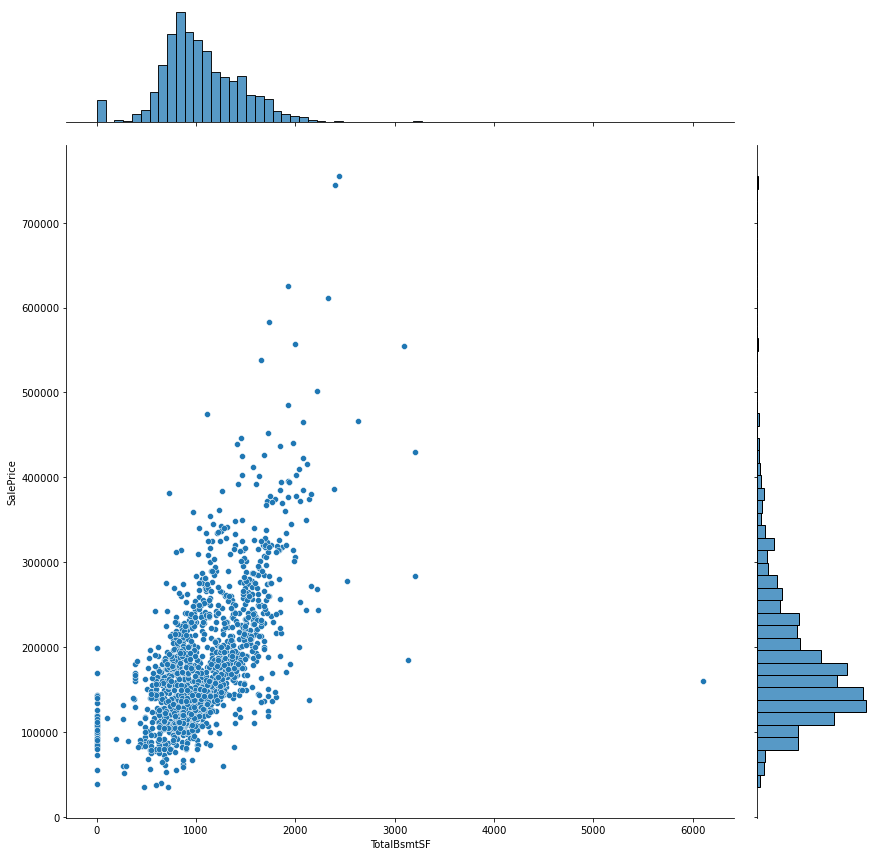

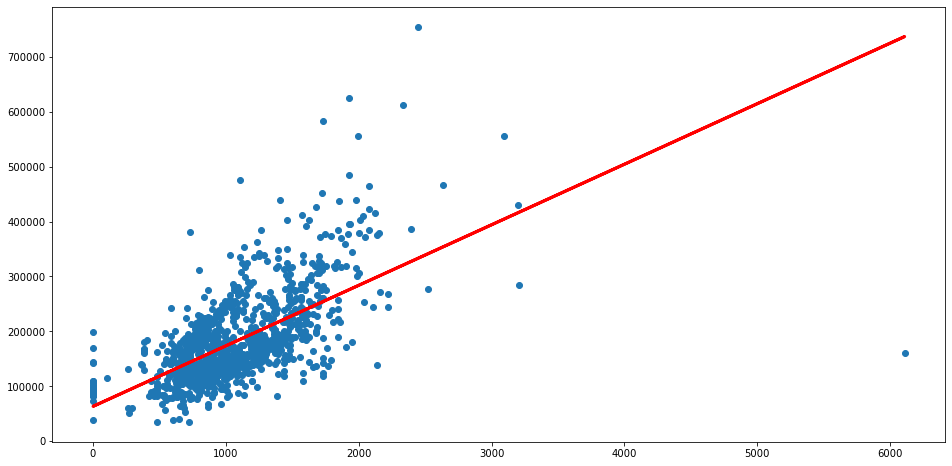

Intercept 	: b =  [73086.10584978]
Coefficients 	: a =  [[227.3984025]]


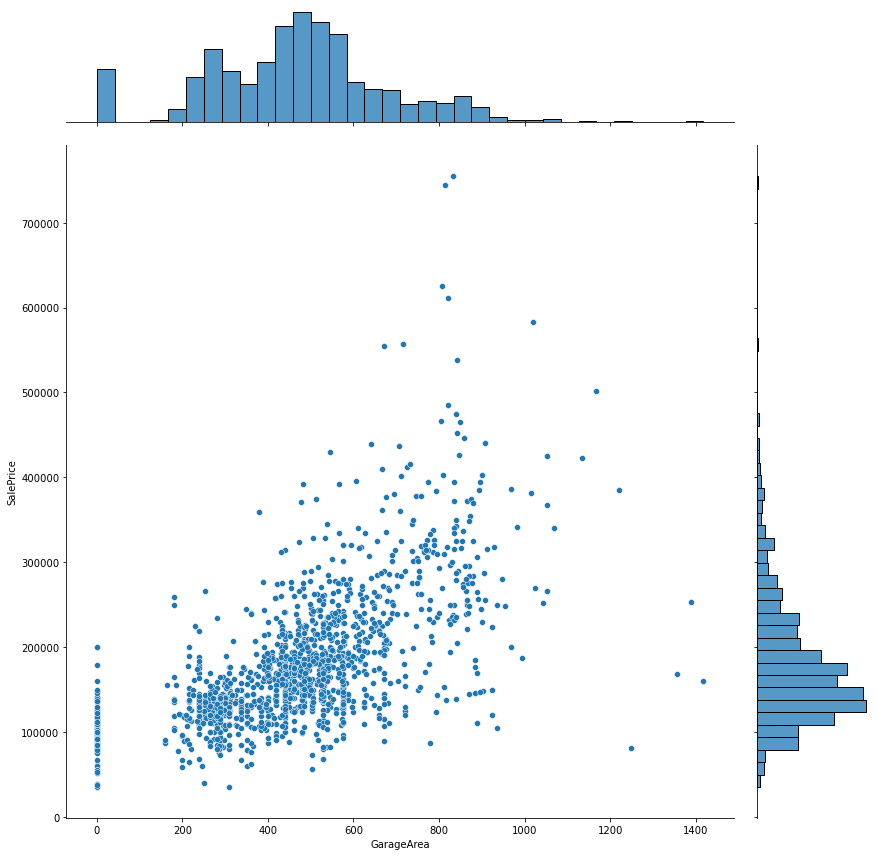

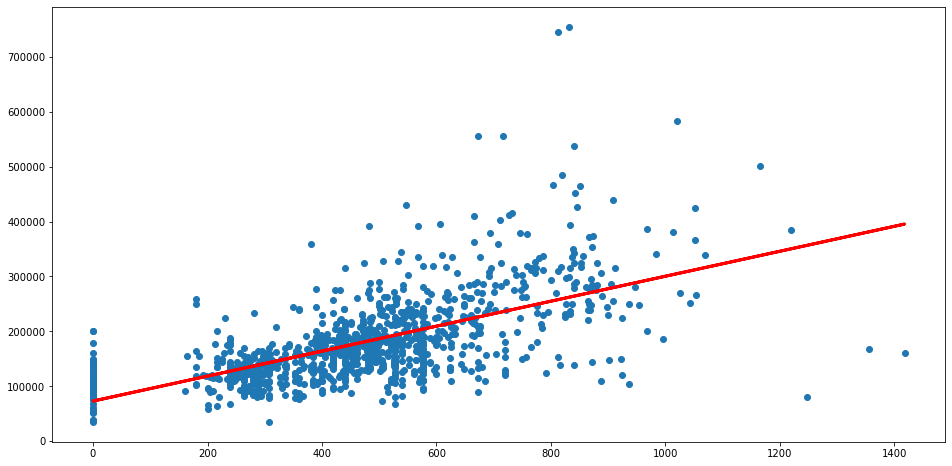

In [13]:
predictors = ["LotArea", "TotalBsmtSF", "GarageArea"]
for predictor in predictors:
    #print(">>>", predictor)
    
    SP = pd.DataFrame(houseData['SalePrice'])
    predictorr = pd.DataFrame(houseData[predictor])

    # Create a joint dataframe by concatenating the two variables
    SPGLAdataframe = pd.concat([SP, predictorr], axis = 1).reindex(SP.index)

    # Jointplot of SP againat GLA
    sb.jointplot(data = SPGLAdataframe, x = predictor, y = "SalePrice", height = 12)
    
    
    # Split the dataset into train and test
    houseData_train, houseData_test = train_test_split(houseData, test_size = 0.246)
    # Check the sample sizes
    #print("Train Set :", houseData_train.shape)
    #print("Test Set  :", houseData_test.shape)
    
    
    # Create a Linear Regression object
    linreg = LinearRegression()
    # Obtain SP and predictor from the training data
    SP_train = pd.DataFrame(houseData_train['SalePrice'])
    predictor_train = pd.DataFrame(houseData_train[predictor])
    # Train the linear regression model on the train dataset
    # (predictor, response)
    linreg.fit(predictor_train, SP_train)
    
    
    
    # Coefficients of the Linear Regression line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    
    import matplotlib.pyplot as plt
    # Formula for the Regression line
    regline_x = predictor_train
    regline_y = linreg.intercept_ + linreg.coef_ * predictor_train
    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(predictor_train, SP_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()

# Problem 3 : Best Uni-Variate Model to Predict SalePrice
Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data,
the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”.

In [15]:
predictors = ["LotArea", "TotalBsmtSF", "GarageArea"]
for predictor in predictors:
    print(">>>", predictor)
    
    houseData_train, houseData_test = train_test_split(houseData, test_size = 0.246)
    # Check the sample sizes
    #print("Train Set :", houseData_train.shape)
    #print("Test Set  :", houseData_test.shape)
    
    #e
    # Create a Linear Regression object
    linreg = LinearRegression()
    # Obtain SP and predictor from the training data
    SP_train = pd.DataFrame(houseData_train['SalePrice'])
    predictor_train = pd.DataFrame(houseData_train[predictor])
    # Train the linear regression model on the train dataset
    # (predictor, response)
    linreg.fit(predictor_train, SP_train)
    
    #f
    # Coefficients of the Linear Regression line
    #print('Intercept \t: b = ', linreg.intercept_)
    #print('Coefficients \t: a = ', linreg.coef_)
    # Formula for the Regression line
    #regline_x = predictor_train
    #regline_y = linreg.intercept_ + linreg.coef_ * predictor_train
    # Plot the Linear Regression line
    #f = plt.figure(figsize=(16, 8))
    #plt.scatter(predictor_train, SP_train)
    #plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    #plt.show()

    
    # Predict Total values corresponding to HP
    SP_train_pred = linreg.predict(predictor_train)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(predictor_train, SP_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_train, SP_train_pred))
    print()

    predictor_test = pd.DataFrame(houseData_test[predictor])
    SP_test_pred = linreg.predict(predictor_test)
    
    # Plot the Predictions vs the True values
    #f, axes = plt.subplots(1, 1, figsize=(24, 12))

    SP_test = pd.DataFrame(houseData_test['SalePrice'])

    #axes.scatter(SP_test, SP_test_pred, color = "green")
    #axes.plot(SP_test, SP_test, 'w-', linewidth = 1)
    #axes.set_xlabel("True values of the Response Variable (Test)")
    #axes.set_ylabel("Predicted values of the Response Variable (Test)")
    #plt.show()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(predictor_test, SP_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(SP_test, SP_test_pred))
    print()
    
    

>>> LotArea
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06859375426420566
Mean Squared Error (MSE) 	: 5762794666.105581

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06853781058972885
Mean Squared Error (MSE) 	: 6213405360.24735

>>> TotalBsmtSF
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.35209179390427114
Mean Squared Error (MSE) 	: 4135571285.5374084

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4507859937477421
Mean Squared Error (MSE) 	: 3331596963.173478

>>> GarageArea
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37362654854679
Mean Squared Error (MSE) 	: 4028576704.627458

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.43636701787717824
Mean Squared Error (MSE) 	: 3339675513.5330987



# Comparing:
LotArea

> Goodness of Fit of Model 	Train Dataset

> Explained Variance (R^2) 	: 0.06859375426420566

> Mean Squared Error (MSE) 	: 5762794666.105581



> Goodness of Fit of Model 	Test Dataset

> Explained Variance (R^2) 	: 0.06853781058972885

> Mean Squared Error (MSE) 	: 6213405360.24735



TotalBsmtSF

> Goodness of Fit of Model 	Train Dataset

> Explained Variance (R^2) 	: 0.35209179390427114

> Mean Squared Error (MSE) 	: 4135571285.5374084



> Goodness of Fit of Model 	Test Dataset

> Explained Variance (R^2) 	: 0.4507859937477421

> Mean Squared Error (MSE) 	: 3331596963.173478



GarageArea

> Goodness of Fit of Model 	Train Dataset

> Explained Variance (R^2) 	: 0.37362654854679

> Mean Squared Error (MSE) 	: 4028576704.627458



> Goodness of Fit of Model 	Test Dataset

> Explained Variance (R^2) 	: 0.43636701787717824

> Mean Squared Error (MSE) 	: 3339675513.5330987



GrLivArea

> Goodness of Fit of Model 	Test Dataset

> Explained Variance (R^2) 	: 0.5096530511043058

> Mean Squared Error (MSE) 	: 2995540052.328356



GrLivArea has highest R^2 and lowest MSE among all, making it have the best goodness of fit and hence the best predictor of "SalePrice".